# Importing Modules for Data Analysis

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Data Acquisition

In [293]:
# loading the csv data to a Pandas DataFrame
df = data = pd.read_csv("cardio_train.csv", sep = ";")

# Scanning the DataFrame

In [294]:
# printing first 10 rows of the dataset
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [295]:
# printing last 10 rows of the dataset
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [296]:
# number of rows and columns in the dataset
df.shape

(70000, 13)

In [297]:
# datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [298]:
# checking for missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

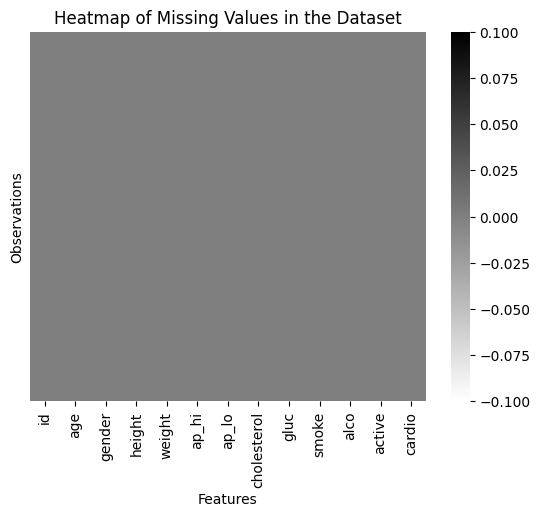

In [318]:
# heatmap of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='binary')
plt.title('Heatmap of Missing Values in the Dataset')
plt.xlabel('Features')
plt.ylabel('Observations')
plt.show()

In [300]:
# statistical measure of the dataset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [301]:
# correlation among the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


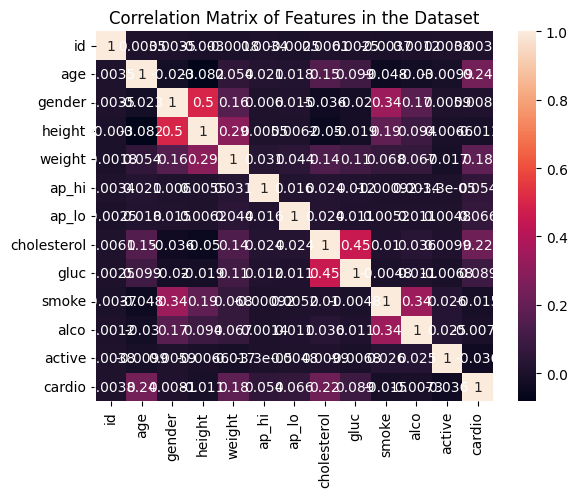

In [302]:
# heatmap of the correlation
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix of Features in the Dataset')
plt.show()

In [303]:
# checking the distribution of target variables
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

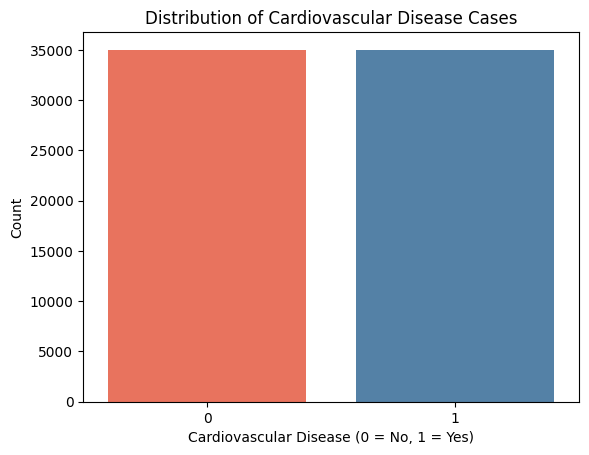

In [304]:
# visualizing the distribution of target variables
sns.countplot(x='cardio', hue='cardio', data=df, palette=['#FF6347', '#4682B4'], legend=False)
plt.title('Distribution of Cardiovascular Disease Cases')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Splitting the Features and Target

In [305]:
# creating two different datasets where:
# X = dataset without the cardio column
# Y = dataset with only the cardio column
X = df.drop(columns='cardio', axis=1)
Y = df[['cardio']]

In [306]:
# printing first 10 rows of X
X.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0


In [307]:
# printing first 10 rows of Y
Y.head(10)

,cardio
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# Splitting the Dataset into Training Data and Test Data

In [308]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1) 

In [309]:
print(X.shape, X_train.shape, X_test.shape)

(70000, 12) (49000, 12) (21000, 12)


# Model Training

In [310]:
# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [311]:
model = LogisticRegression(solver='liblinear', max_iter=5000, C=0.1)

In [312]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=0.1, max_iter=5000, solver='liblinear')

# Model Evaluation

In [313]:
# accuracy on Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [321]:
# printing accuracy on Training Data
print("Training Accuracy: " + str(training_data_accuracy))

Training Accuracy: 0.7044489795918367


In [315]:
# accuracy on Test Data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [322]:
# printing accuracy on Testing Data
print("Testing Accuracy: " + str(testing_data_accuracy))

Testing Accuracy: 0.7070952380952381


# Data Prediction System

In [317]:
# feature names during training
columns = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# random input data for prediction system
input_data_list = (0, 18857, 1, 165, 64.0, 130, 70, 3, 1, 0, 0, 0)

# converting the input to a DataFrame
input_data = pd.DataFrame([input_data_list], columns=columns)

# prediction using the model
prediction = model.predict(input_data)
print(prediction)

if prediction[0] == 0:
    print("The person does not have cardiovascular disease")
else:
    print("The person has cardiovascular disease")


[1]
The person has cardiovascular disease
